In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
N = 30
X = (np.random.random(N)*10) - 5

Y  = 0.5*X - 2 + np.random.random(N)

In [3]:
X.shape, Y.shape

((30,), (30,))

In [4]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [5]:
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [6]:
X = torch.from_numpy(X.astype("float32"))
Y =  torch.from_numpy(Y.astype("float32"))

In [7]:
type(X)

torch.Tensor

In [8]:
## Building a model
model = nn.Linear(1,1)


In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [10]:
type(Y),Y.shape

(torch.Tensor, torch.Size([30, 1]))

In [11]:

#Training a model
epochs = 100
losses = []
for i in range(epochs):
  optimizer.zero_grad()

  outputs = model(X)
  
  loss = criterion(outputs,Y)

  print(f" epoch:{i+1} --- {loss}")

  losses.append(loss.item())
  loss.backward()

  

  optimizer.step()


 epoch:1 --- 10.350014686584473
 epoch:2 --- 4.05222749710083
 epoch:3 --- 1.968056082725525
 epoch:4 --- 1.1224642992019653
 epoch:5 --- 0.7037553191184998
 epoch:6 --- 0.4664880633354187
 epoch:7 --- 0.32232847809791565
 epoch:8 --- 0.23198792338371277
 epoch:9 --- 0.17464707791805267
 epoch:10 --- 0.13806530833244324
 epoch:11 --- 0.11468014866113663
 epoch:12 --- 0.0997190922498703
 epoch:13 --- 0.0901445597410202
 epoch:14 --- 0.08401643484830856
 epoch:15 --- 0.08009398728609085
 epoch:16 --- 0.07758327573537827
 epoch:17 --- 0.0759761855006218
 epoch:18 --- 0.07494749873876572
 epoch:19 --- 0.07428905367851257
 epoch:20 --- 0.0738675594329834
 epoch:21 --- 0.07359780371189117
 epoch:22 --- 0.07342512160539627
 epoch:23 --- 0.07331457734107971
 epoch:24 --- 0.07324381917715073
 epoch:25 --- 0.07319853454828262
 epoch:26 --- 0.07316954433917999
 epoch:27 --- 0.07315099239349365
 epoch:28 --- 0.07313910871744156
 epoch:29 --- 0.07313152402639389
 epoch:30 --- 0.07312663644552231
 e

In [12]:

weight = model.weight.data.numpy()
bias = model.bias.data.numpy()
weight,bias





(array([[0.4941049]], dtype=float32), array([-1.5042276], dtype=float32))

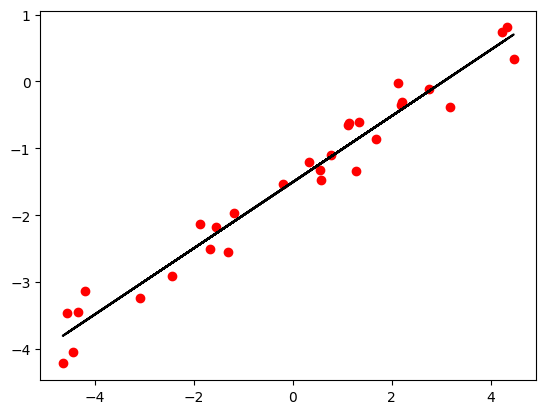

In [13]:
#plotting the fit line

plt.scatter(X.numpy(),Y.numpy(), c = "red")
plt.plot(X.numpy(), model(X).detach().numpy(), label = "Fittted Line", c = "black")
plt.show()

In [14]:
type(X)

torch.Tensor

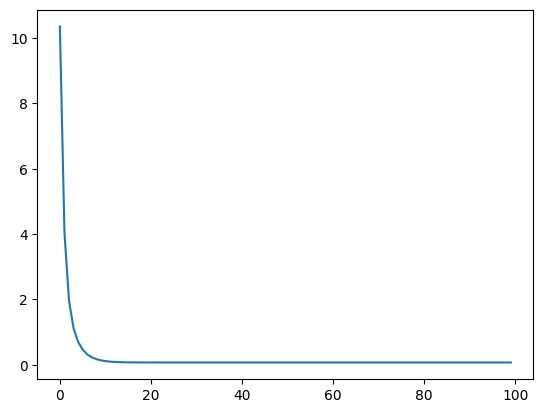

In [15]:
plt.plot(losses)
plt.show()